## Brief - An analysis of paleo-present climate data
- Analyse CO2 vs Temperature Anomaly from 800kyrs – present.
- Examine one other (paleo/modern) features (e.g. CH4 or polar ice-coverage)
- Examine Irish context:
- Climate change signals: (see Maynooth study: The emergence of a climate change
signal in long-term Irish meteorological observations - ScienceDirect)
- Fuse and analyse data from various data sources and format fused data set as a pandas
dataframe and export to csv and json formats.
- For all of the above variables, analyse the data, the trends and the relationships between
them (temporal leads/lags/frequency analysis).
- Predict global temperature anomaly over next few decades (synthesise data) and compare to
published climate models if atmospheric CO2 trends continue
- Comment on accelerated warming based on very latest features (e.g. temperature/polar-ice-
coverage
- Use a Jupyter notebook for your analysis and track your progress using GitHub.
Use an academic referencing style

In [248]:
import pandas as pd

# 
pd.set_option('display.max_rows', None)
csv_file_path = "Co2.csv"

df = pd.read_csv(csv_file_path)

# No NaN values
df = df.dropna(axis=1, how='all')


print(df)


         YearBP  CO2 (ppmv)  sigma mean CO2 (ppmv)
0        -51.03      368.02                   0.06
1        -48.00      361.78                   0.37
2        -46.28      359.65                   0.10
3        -44.41      357.11                   0.16
4        -43.08      353.95                   0.04
5        -42.31      353.72                   0.22
6        -41.13      352.42                   0.10
7        -39.97      350.81                   0.16
8        -39.41      349.80                   0.14
9        -38.97      349.28                   0.13
10       -38.07      347.60                   0.40
11       -37.21      345.44                   0.03
12       -36.62      344.72                   0.09
13       -36.14      343.97                   0.06
14       -35.76      343.11                   0.14
15       -34.92      342.05                   0.46
16       -33.08      341.33                   0.10
17       -33.03      339.46                   0.30
18       -29.14      334.85    

In [249]:
import pandas as pd

# files
temperature_csv_path = "temp.csv"

temperature_df = pd.read_csv(temperature_csv_path)

# No NaN values for cleanliness
temperature_df = temperature_df.dropna(axis=1, how='all')

# all row
pd.set_option('display.max_rows', None)

print(temperature_df)

      Depth ice/snow [m]  Age model [ka]  %[SNOW]  [DegreesC]  Sample ID
0                   0.00          -0.050      NaN         NaN          1
1                   0.55          -0.044      NaN         NaN          2
2                   1.10          -0.037      NaN         NaN          3
3                   1.65          -0.032      NaN         NaN          4
4                   2.20          -0.025      NaN         NaN          5
5                   2.75          -0.018      NaN         NaN          6
6                   3.30          -0.011      NaN         NaN          7
7                   3.85          -0.003      NaN         NaN          8
8                   4.40           0.005      NaN         NaN          9
9                   4.95           0.014      NaN         NaN         10
10                  5.50           0.022      NaN         NaN         11
11                  6.05           0.031      NaN         NaN         12
12                  6.60           0.038   -390.9  

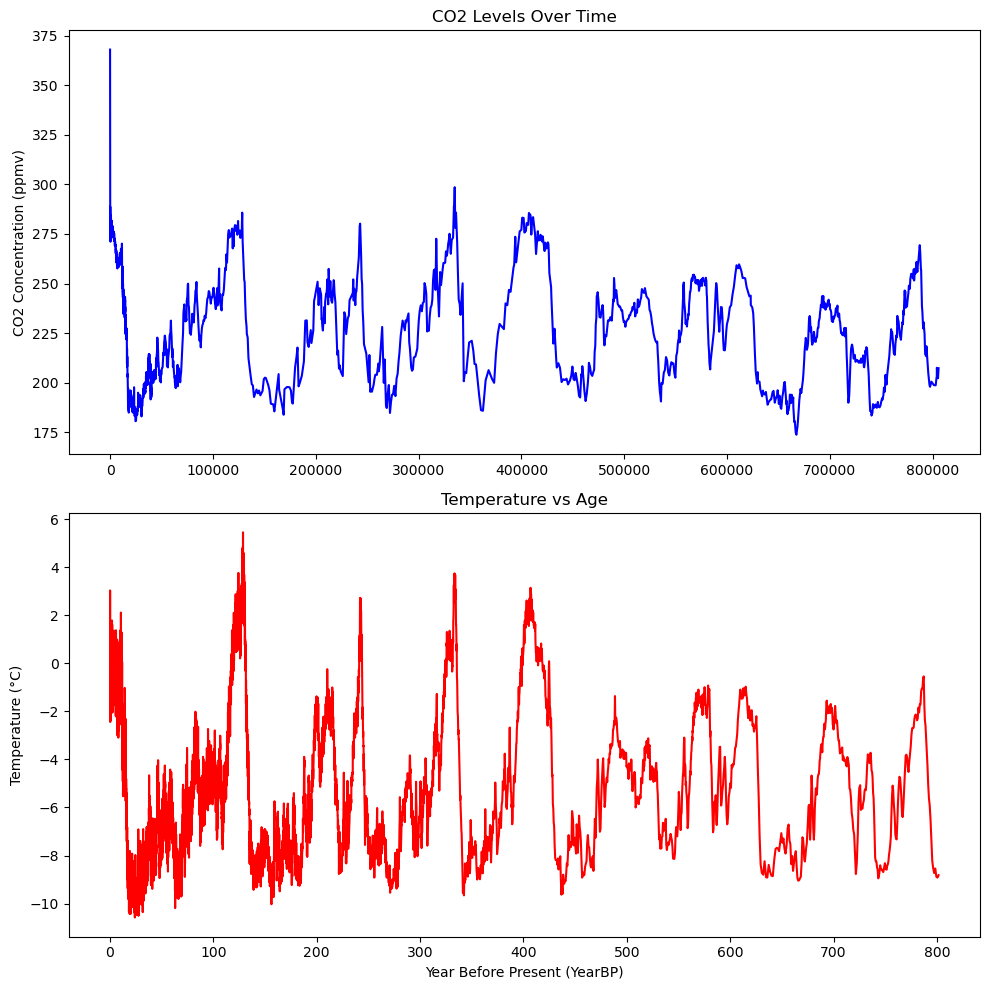

In [250]:
import pandas as pd
import matplotlib.pyplot as plt

# Load
file_path_co2 = 'co2.CSV'  # Replace with the actual file path
file_path_temp = 'temp.csv'  # Replace with the actual file path
df_co2 = pd.read_csv(file_path_co2)
df_temp = pd.read_csv(file_path_temp)

# CO2 
year_column_co2 = 'YearBP'
co2_column_co2 = 'CO2 (ppmv)'

# Temperature
age_column_temp = 'Age model [ka]'
temperature_column_temp = '[DegreesC]'  # Updated column name

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Plot CO2
ax1.plot(df_co2[year_column_co2], df_co2[co2_column_co2], linestyle='-', color='b')
ax1.set_ylabel('CO2 Concentration (ppmv)')
ax1.set_title('CO2 Levels Over Time')

# Plot Temperature
ax2.plot(df_temp[age_column_temp], df_temp[temperature_column_temp], linestyle='-', color='r')
ax2.set_xlabel('Year Before Present (YearBP)')
ax2.set_ylabel('Temperature (°C)')
ax2.set_title('Temperature vs Age')

plt.tight_layout()

# Show the plot
plt.show()

In [251]:
import pandas as pd

file_path = 'temp.csv'
df = pd.read_csv(file_path)

# highest delta
max_temp_row = df[df['[DegreesC]'] == df['[DegreesC]'].max()]

# Find the lowest
min_temp_row = df[df['[DegreesC]'] == df['[DegreesC]'].min()]

# mean 
mean_temp_value = df['[DegreesC]'].mean()

# Extract information
max_temp_age = max_temp_row['Age model [ka]'].values[0]
min_temp_age = min_temp_row['Age model [ka]'].values[0]
max_temp_value = max_temp_row['[DegreesC]'].values[0]
min_temp_value = min_temp_row['[DegreesC]'].values[0]

# Print results
print(f'Highest Temperature: {max_temp_value}°C at Age {max_temp_age} ka')
print(f'Lowest Temperature: {min_temp_value}°C at Age {min_temp_age} ka')
print(f'Mean Temperature: {mean_temp_value}°C')

Highest Temperature: 5.46°C at Age 128.662 ka
Lowest Temperature: -10.58°C at Age 24.015 ka
Mean Temperature: -4.577593296475467°C


In [252]:
import pandas as pd
from scipy.stats import pearsonr

file_path_temp = 'temp.csv'
file_path_co2 = 'co2.csv'
df_temp = pd.read_csv(file_path_temp)
df_co2 = pd.read_csv(file_path_co2)

temperature_column_temp = '[DegreesC]'  # Adjusted column name
co2_column_co2 = 'CO2 (ppmv)'

# Merged
df_merged = pd.merge(df_temp, df_co2, left_on='Age model [ka]', right_on='YearBP', how='inner')

# Drop missing rows
df_temp_co2 = df_merged[[temperature_column_temp, co2_column_co2]].dropna()

# correlation coefficient
corr_coefficient, _ = pearsonr(df_temp_co2[temperature_column_temp], df_temp_co2[co2_column_co2])

print(f'Correlation Coefficient: {corr_coefficient}')

Correlation Coefficient: 0.84540633240228


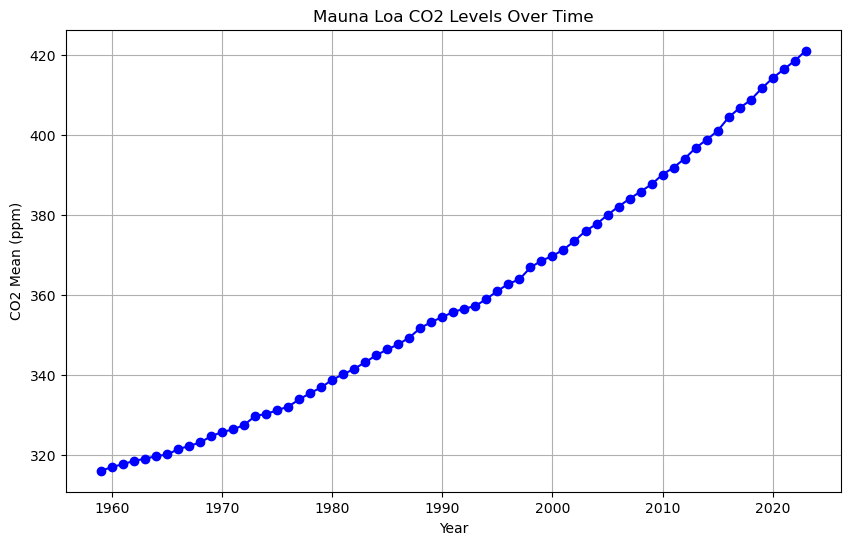

In [253]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('manoaloa.csv')

# Plot it
plt.figure(figsize=(10, 6))
plt.plot(df['year'], df['mean'], marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('CO2 Mean (ppm)')
plt.title('Mauna Loa CO2 Levels Over Time')
plt.grid(True)
plt.show()

In [261]:
import pandas as pd

# datasets with only 'YearBP' and 'Mean'
df1_selected = pd.read_csv('fusedco2.csv')
df2_selected = pd.read_csv('manoaloafused_selected.csv')

# reverse order for greater 'legibility'
df2_selected = df2_selected.sort_values(by='YearBP', ascending=False)

# fuse
merged_selected_df = pd.concat([df2_selected, df1_selected])


merged_selected_df.to_csv('fusedc02.csv', index=False)


pd.set_option('display.max_rows', None)
print(merged_selected_df)

         YearBP    Mean
64      2023.00  421.08
63      2022.00  418.53
62      2021.00  416.41
61      2020.00  414.21
60      2019.00  411.65
59      2018.00  408.72
58      2017.00  406.76
57      2016.00  404.41
56      2015.00  401.01
55      2014.00  398.81
54      2013.00  396.74
53      2012.00  394.06
52      2011.00  391.85
51      2010.00  390.10
50      2009.00  387.64
49      2008.00  385.83
48      2007.00  384.02
47      2006.00  382.09
46      2005.00  379.98
45      2004.00  377.70
44      2003.00  375.98
43      2002.00  373.45
42      2001.00  371.32
41      2000.00  369.71
40      1999.00  368.54
39      1998.00  366.84
38      1997.00  363.88
37      1996.00  362.74
36      1995.00  360.97
35      1994.00  358.96
34      1993.00  357.21
33      1992.00  356.54
32      1991.00  355.70
31      1990.00  354.45
30      1989.00  353.20
29      1988.00  351.69
28      1987.00  349.31
27      1986.00  347.61
26      1985.00  346.35
25      1984.00  344.87
24      1983.00 

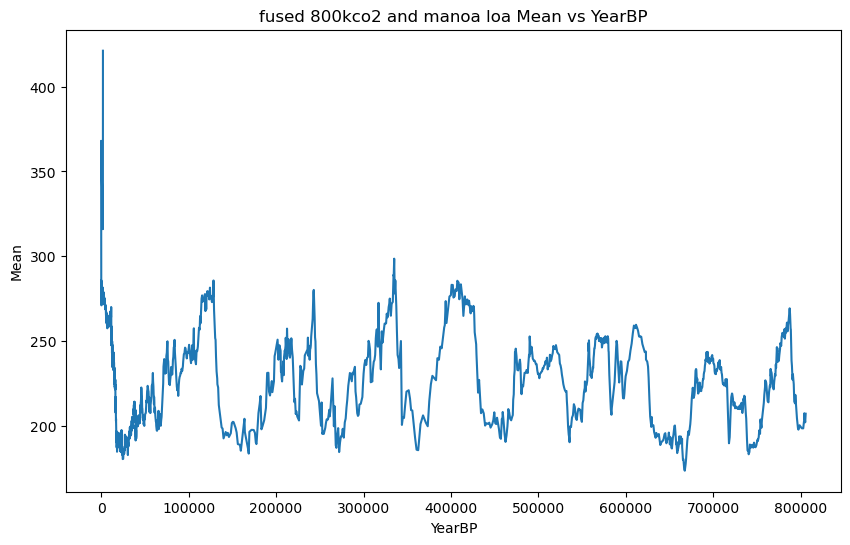

In [278]:
plt.figure(figsize=(10,6))
plt.plot(merged_selected_df['YearBP'], merged_selected_df['Mean'])
plt.xlabel('YearBP')
plt.ylabel('Mean')
plt.title('fused 800kco2 and manoa loa Mean vs YearBP')
plt.show()

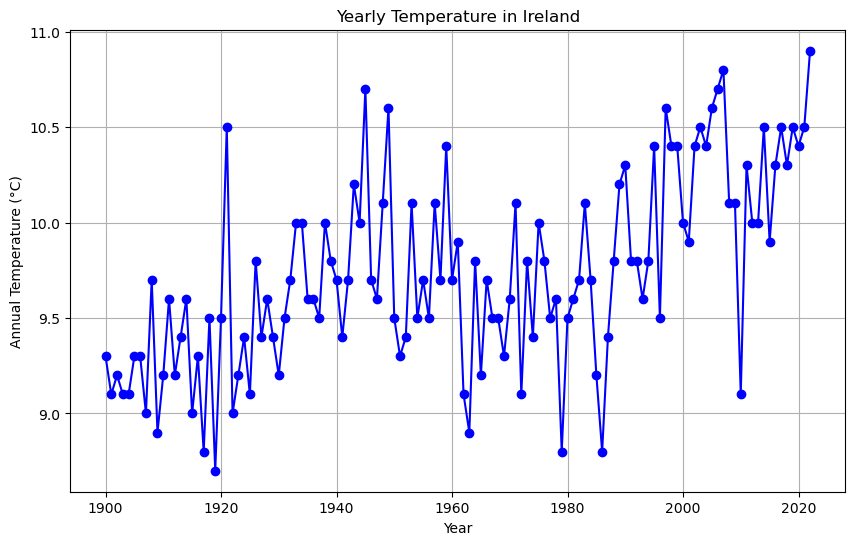

In [279]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = 'irishtemps.csv'  
df = pd.read_csv(file_path)

year_column = 'year'
temperature_column = 'Annual'


plt.figure(figsize=(10, 6))
plt.plot(df[year_column], df[temperature_column], marker='o', linestyle='-', color='b')


plt.xlabel('Year')
plt.ylabel('Annual Temperature (°C)')
plt.title('Yearly Temperature in Ireland')

# Show the plot
plt.grid(True)
plt.show()

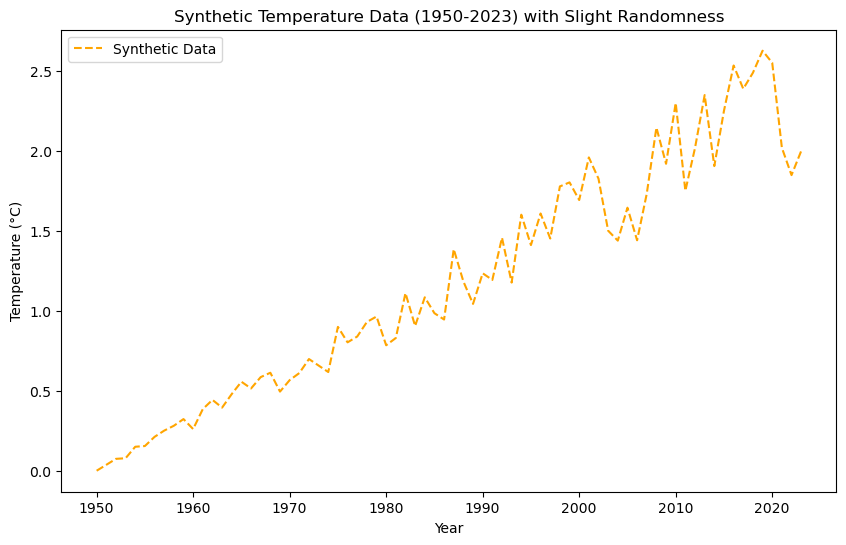

In [280]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the warming rate
warming_rate_low = 0.022  # Adjusted for a constant warming rate per year
warming_rate_high = 0.032


years_1950_to_2023 = 2023 - 1950


base_synthetic_temperatures = np.linspace(0, years_1950_to_2023 * warming_rate_high, years_1950_to_2023 + 1)
synthetic_temperatures = base_synthetic_temperatures + np.random.uniform(-0.2 * base_synthetic_temperatures, 0.2 * base_synthetic_temperatures)

synthetic_index = np.arange(1950, 2024)

#
synthetic_df = pd.DataFrame({'Synthetic_Temperature': synthetic_temperatures}, index=synthetic_index)

# Plot the synthetic data with a bit of randomness
plt.figure(figsize=(10, 6))
plt.plot(synthetic_index, synthetic_df['Synthetic_Temperature'], label='Synthetic Data', linestyle='--', color='orange')
plt.title('Antarctice Synthetic Temperature Data (1950-2023) with Slight Randomness')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

In [281]:
import pandas as pd
import numpy as np


warming_rate_low = 0.022  # Adjusted for a constant warming rate per year
warming_rate_high = 0.032

# 1950 to 2023
years_1950_to_2023 = 2023 - 1950

# Based off current Antarctice studies
base_synthetic_temperatures = np.linspace(0, years_1950_to_2023 * warming_rate_high, years_1950_to_2023 + 1)
synthetic_temperatures = base_synthetic_temperatures + np.random.uniform(-0.2 * base_synthetic_temperatures, 0.2 * base_synthetic_temperatures)

# new time needed
synthetic_index = np.arange(1950, 2024)


synthetic_df = pd.DataFrame({'Synthetic_Temperature': synthetic_temperatures}, index=synthetic_index)

# CSV file for syn data
synthetic_df.to_csv('synthetic_temperature_data.csv')


print(synthetic_df)

      Synthetic_Temperature
1950               0.000000
1951               0.038334
1952               0.069643
1953               0.092005
1954               0.148479
1955               0.178936
1956               0.201892
1957               0.217883
1958               0.245811
1959               0.249968
1960               0.361821
1961               0.319948
1962               0.381901
1963               0.489505
1964               0.517876
1965               0.568172
1966               0.501623
1967               0.585515
1968               0.472663
1969               0.602259
1970               0.568750
1971               0.543380
1972               0.652633
1973               0.644223
1974               0.749342
1975               0.682300
1976               0.940781
1977               0.771270
1978               0.847729
1979               1.078542
1980               1.128104
1981               0.901026
1982               1.100636
1983               1.200547
1984               1

In [282]:
import pandas as pd


file_path_original = 'tempcopy.csv'
original_df = pd.read_csv(file_path_original)


print("Column Names in the Original DataFrame:")
print(original_df.columns)

selected_df = original_df[[' Year', '[DegreesC]']].copy()

# Rename columns for clarity
selected_df.columns = ['Year', 'DegreesC']


selected_df.to_csv('selected_temperature_data.csv', index=False)


print("\nSelected DataFrame:")
print(selected_df.head())

Column Names in the Original DataFrame:
Index(['Depth ice/snow [m]', ' Year', '%[SNOW]', '[DegreesC]', 'Sample ID'], dtype='object')

Selected DataFrame:
    Year  DegreesC
0 -0.050       NaN
1 -0.044       NaN
2 -0.037       NaN
3 -0.032       NaN
4 -0.025       NaN


In [283]:
import pandas as pd

file_path_original = 'newtemp.csv'
original_df = pd.read_csv(file_path_original)


file_path_synthetic = 'synthtemp.csv'
synthetic_df = pd.read_csv(file_path_synthetic)

synthetic_df = synthetic_df.sort_values(by='Year', ascending=False)


fused_df = pd.concat([synthetic_df, original_df])


fused_df.to_csv('new_fused_temperature_data.csv', index=False)

# fused DataFr
print(fused_df.head())

      Year   DegreesC
73  2023.0   2.635421
72  2022.0   1.944159
71  2021.0   2.714223
70  2020.0   2.140730
69  2019.0   2.384639


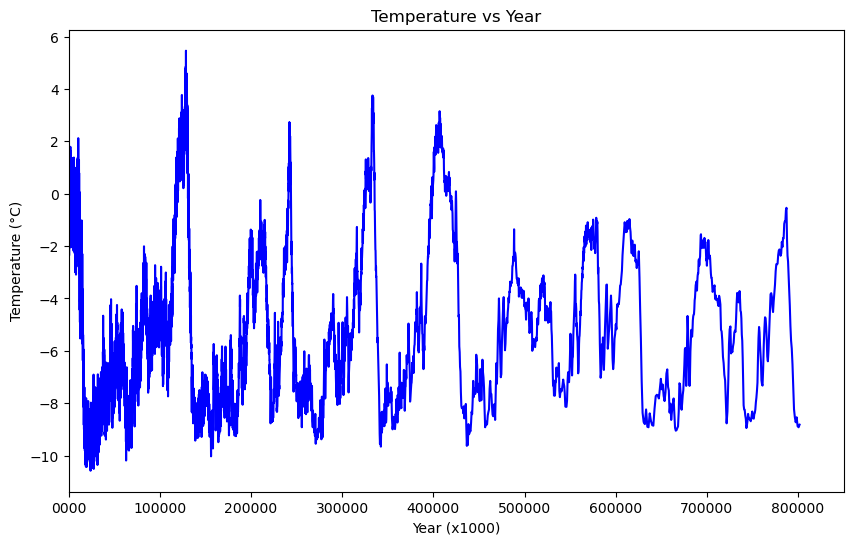

In [290]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('new_fused_temperature_data.csv')

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df[' DegreesC'], label='Temperature', color='blue')
plt.xlabel('Year (x1000)')
plt.ylabel('Temperature (°C)')
plt.title('Temperature vs Year')

# limits
plt.xlim(0, 850)

# x axis in thousands of years aka x1000
plt.xticks([x for x in range(0, 851, 100)], labels=[f'{x}000' for x in range(0, 851, 100)])

plt.show()